In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sb
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Data/boston.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
X = df[['AGE', 'LSTAT']].values
y = df['MEDV'].values

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

model = LinearRegression()
pipeline = Pipeline([
    ('regressor', model)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [6]:
y_train_pred = pipeline.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
y_test_pred = model.predict(X_test)

#R-squared
r2_test = r2_score(y_test, y_test_pred)
print("R-squared (R2) for Training Data:", r2_train)
print("R-squared (R2) for Test Data:", r2_test)

R-squared (R2) for Training Data: 0.5630979953818331
R-squared (R2) for Test Data: 0.40696769371975816


In [7]:
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mae_train =metrics.mean_absolute_error(y_train, y_train_pred)
#MAE scores
print("Mean Absolute Error (MAE) for Training Data:", mae_train)
print("Mean Absolute Error (MAE) for Test Data:", mae_test)

Mean Absolute Error (MAE) for Training Data: 4.566213908719439
Mean Absolute Error (MAE) for Test Data: 4.59187457150265


In [8]:
rmse_train = metrics.mean_squared_error(y_train,y_train_pred)
# Calculate RMSE for the test data
rmse_test = metrics.mean_squared_error(y_test,y_test_pred)

# Print the RMSE scores
print("Root Mean Squared Error (RMSE) for Training Data:", rmse_train)
print("Root Mean Squared Error (RMSE) for Test Data:", rmse_test)

Root Mean Squared Error (RMSE) for Training Data: 38.20805667876179
Root Mean Squared Error (RMSE) for Test Data: 39.24693104001134


In [9]:
mape_train = metrics.mean_absolute_percentage_error(y_train,y_train_pred)

mape_test = metrics.mean_absolute_percentage_error(y_test,y_test_pred)
print( mape_train)
print( mape_test)

0.21828894529148998
0.2547803169337024


<Axes: >

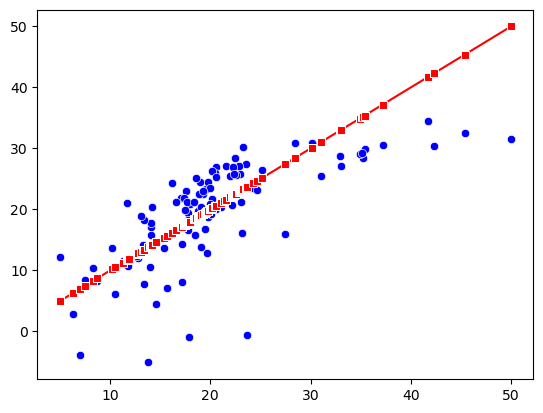

In [10]:
sb.lineplot(x=y_test.flatten(), y=y_test.flatten(), marker='s', color='r')
sb.scatterplot(x=y_test.flatten(), y=y_test_pred.flatten(), marker='o', color='b')


In [11]:
y_test_pred = model.predict(X_test)
dfTestValidation = pd.DataFrame(list(zip(X_test[: ,0], X_test[:,1],
                                        y_test.flatten(),
                                        y_test_pred.flatten())),
                                        columns = ['AGE&ISTAT_test', 'MEDV_test', 'y_test', 'y_test_predicted'])
dfTestValidation['Residual'] = dfTestValidation['y_test']- dfTestValidation['y_test_predicted']
dfTestValidation


,AGE&ISTAT_test,MEDV_test,y_test,y_test_predicted,Residual
0,100.0,7.39,23.3,30.301775,-7.001775
1,93.9,22.88,12.8,12.027361,0.772639
2,77.8,29.97,6.3,2.896873,3.403127
3,51.8,6.58,35.2,28.464566,6.735434
4,98.4,14.59,17.1,21.878644,-4.778644
...,...,...,...,...,...
97,88.4,14.65,17.7,21.233607,-3.533607
98,25.8,9.97,19.3,23.045448,-3.745448
99,94.9,21.45,15.4,13.739558,1.660442
100,95.4,15.03,18.4,21.196842,-2.796842


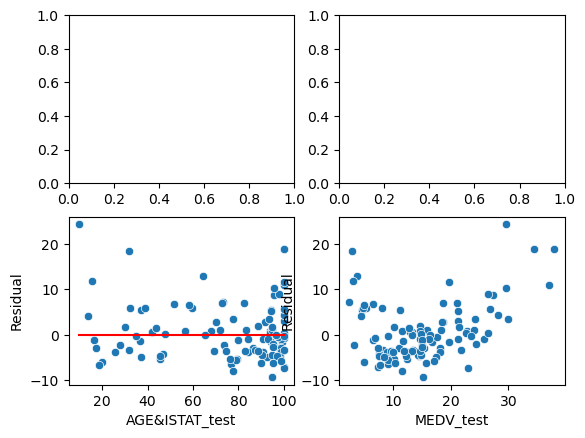

In [12]:
fig,axes = plt.subplots(2,2)
sb.scatterplot(data=dfTestValidation,x='AGE&ISTAT_test',y='Residual',ax=axes[1,0])
sb.lineplot(data=dfTestValidation,x='AGE&ISTAT_test',y=[0]*len(dfTestValidation),color='r',ax=axes[1,0])
sb.scatterplot(data=dfTestValidation,x='MEDV_test',y='Residual',ax=axes[1,1])
plt.show()

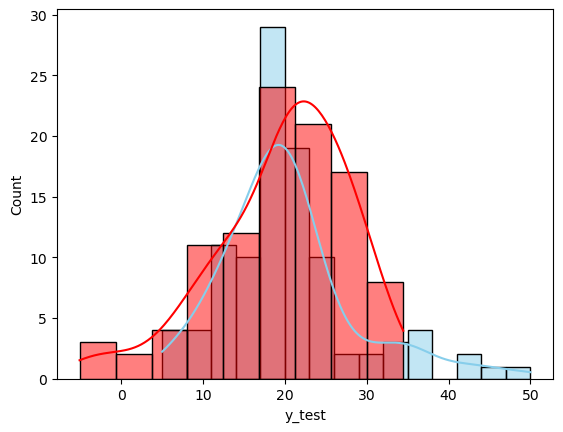

In [13]:
sb.histplot(data=dfTestValidation,x='y_test',color='skyblue',label='Actual',kde=True)
sb.histplot(data=dfTestValidation,x='y_test_predicted',color='red',label='Forecast',kde=True)
plt.show()